<a href="https://colab.research.google.com/github/hitanshu5/Image-Processing-and-Computer-Vision/blob/main/IPCVEXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy opencv-python matplotlib

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def display_images(before, after, title1, title2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(before, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(after, cmap='gray')
    plt.axis('off')

    plt.show()

## Read RGB Image

In [ ]:
def read_image(image_path=None):
    if image_path is None:
        return generate_gradient_image()
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found or unable to read.")
    return img

## Function for Contrast Stretching Image

In [ ]:
def contrast_stretching(img, r1, s1, r2, s2):
    L = 256
    s = np.zeros(256, dtype=np.uint8)
    for r in range(256):
        if r < r1:
            s[r] = s1 * r / r1
        elif r <= r2:
            s[r] = s1 + (s2 - s1) * (r - r1) / (r2 - r1)
        else:
            s[r] = s2 + (L - 1 - s2) * (r - r2) / (L - 1 - r2)

    return cv2.LUT(img, s)

## Function for Log Transforming Image

In [ ]:
def log_transformation(img, c=1.0):
    img = img.astype(float)
    img_log = c * np.log(1 + img)
    img_log = cv2.normalize(img_log, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(img_log)

## Function for Power Law Transformation

In [ ]:
def power_law_transformation(img, c=1.0, gamma=1.0):
    img = img.astype(float)
    img_pow = c * (img ** gamma)
    img_pow = cv2.normalize(img_pow, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(img_pow)

## Processing RGB Image

In [ ]:
def process_image(image_path):
    gray_img = read_image(image_path)


    contrast_img = contrast_stretching(gray_img, 50, 0, 200, 255)
    display_images(gray_img, contrast_img, 'Original Image', 'Contrast Stretched Image')

    log_img = log_transformation(gray_img, c=30)
    display_images(gray_img, log_img, 'Original Image', 'Log Transformed Image')


    power_img = power_law_transformation(gray_img, c=1.0, gamma=0.5)
    display_images(gray_img, power_img, 'Original Image', 'Power Law Transformed Image')

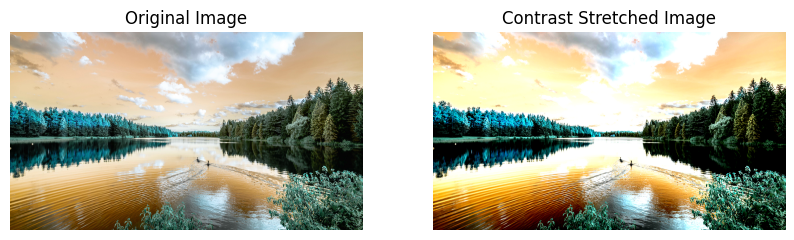

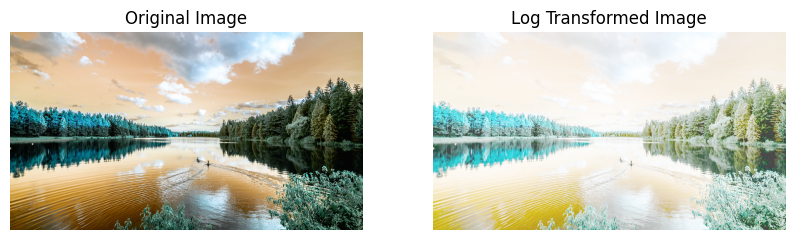

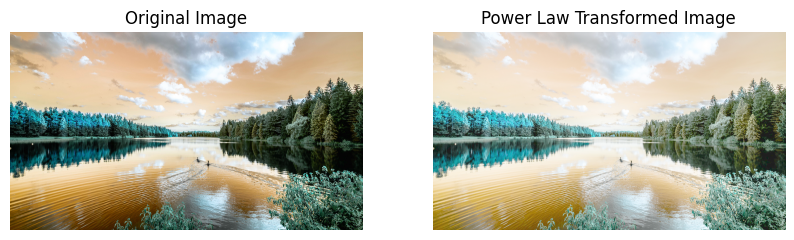

In [ ]:
image_path = '/content/image.jpg'
process_image(image_path)

## Processing GrayScale Image

In [ ]:
def process_gray_image(image_path):
    gray_img = read_gray_image(image_path)


    contrast_img = contrast_stretching(gray_img, 50, 0, 200, 255)
    display_images(gray_img, contrast_img, 'Original Grayscale Image', 'Contrast Stretched Image')

    log_img = log_transformation(gray_img, c=30)
    display_images(gray_img, log_img, 'Original Grayscale Image', 'Log Transformed Image')


    power_img = power_law_transformation(gray_img, c=1.0, gamma=0.5)
    display_images(gray_img, power_img, 'Original Grayscale Image', 'Power Law Transformed Image')

## Reading GrayScale Image

In [ ]:
def read_gray_image(image_path=None):
    if image_path is None:
        return generate_gradient_image()
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or unable to read.")
    return img

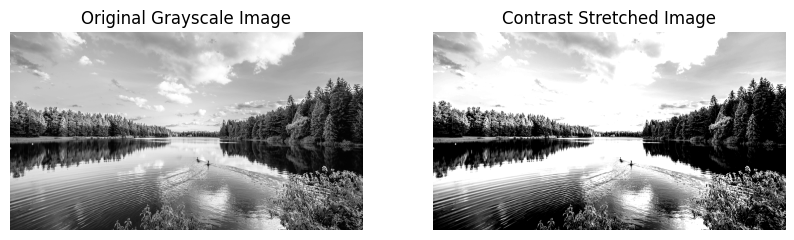

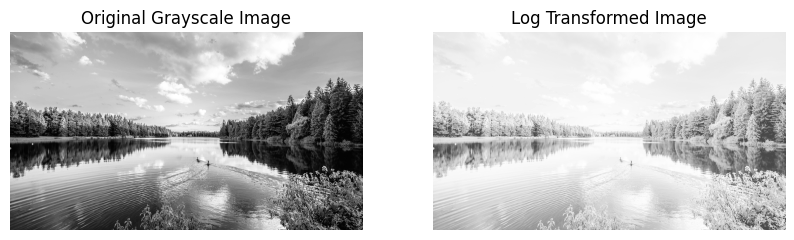

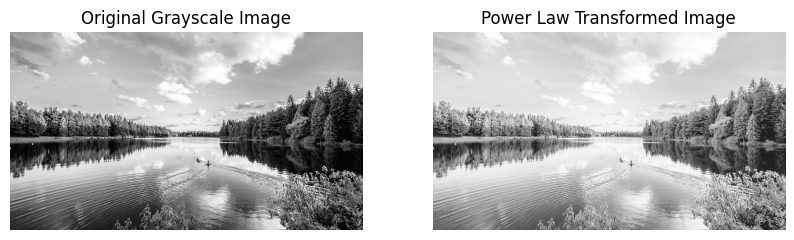

In [ ]:
process_gray_image(image_path)